# Assessment Part 2: Climate Change

In [1]:
library(tidyverse)
library(dslabs)
data(temp_carbon)
data(greenhouse_gases)
data(historic_co2)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.1     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
head(temp_carbon)

,year,temp_anomaly,land_anomaly,ocean_anomaly,carbon_emissions
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1880,-0.11,-0.48,-0.01,236
2,1881,-0.08,-0.40,0.01,243
3,1882,-0.10,-0.48,0.00,256
4,1883,-0.18,-0.66,-0.04,272
5,1884,-0.26,-0.69,-0.14,275
6,1885,-0.25,-0.56,-0.17,277


In [8]:
## Ultimo año reportando emisiones de carbon
temp_carbon |>
    filter(!is.na(carbon_emissions)) |>
    select(year) |>
    max()
temp_carbon |>
    filter(!is.na(carbon_emissions)) |>
    pull(year) |>
    max()

[1] 2014

[1] 2014

In [10]:
temp_carbon |>
    filter(!is.na(carbon_emissions)) |>
    select(year) |>
    min()

[1] 1751

In [27]:
## calculamos la proporción de aumento en la emisión de carbono
temp_carbon |>
    filter(!is.na(carbon_emissions) & year == 2014) |> pull(carbon_emissions) /
temp_carbon |>
    filter(!is.na(carbon_emissions) & year == 1751) |> pull(carbon_emissions)

[1] 3285

In [28]:
temp_carbon |>
    filter(!is.na(temp_anomaly)) |>
    pull(year) |>
    min()

[1] 1880

In [29]:
temp_carbon |>
    filter(!is.na(temp_anomaly)) |>
    pull(year) |>
    max()

[1] 2018

In [31]:
## temperatura en 1880
temp_1880 <- temp_carbon |> filter(year == 1880) |> pull(temp_anomaly)

## temperatura en 2018
temp_2018 <- temp_carbon |> filter(year == 2018) |> pull(temp_anomaly)

## Diferencia de temperatura en 1880-2018

temp_diff <- temp_2018 - temp_1880
temp_diff

[1] 0.93

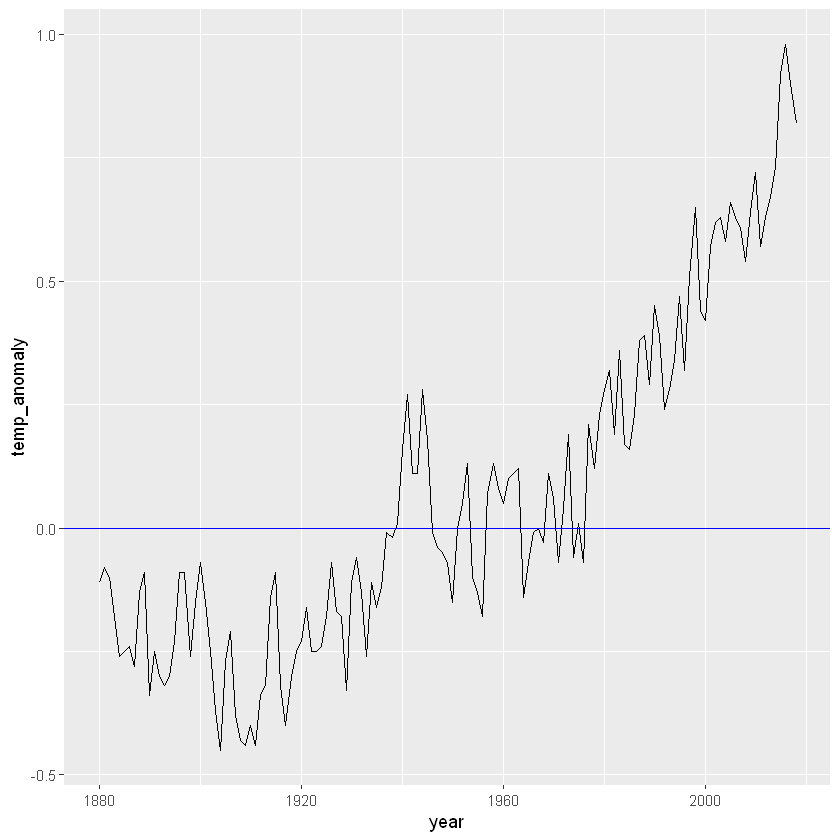

In [44]:
## Gráfico de series de tiempo de la temperatura

p <- temp_carbon |>
    filter(!is.na(temp_anomaly)) |>
    ggplot(aes(year, temp_anomaly)) +
    geom_line()
## agregamos la linea con la temperatura media del siglo 20
p <- p + geom_hline(aes(yintercept = 0), col = "blue")
p

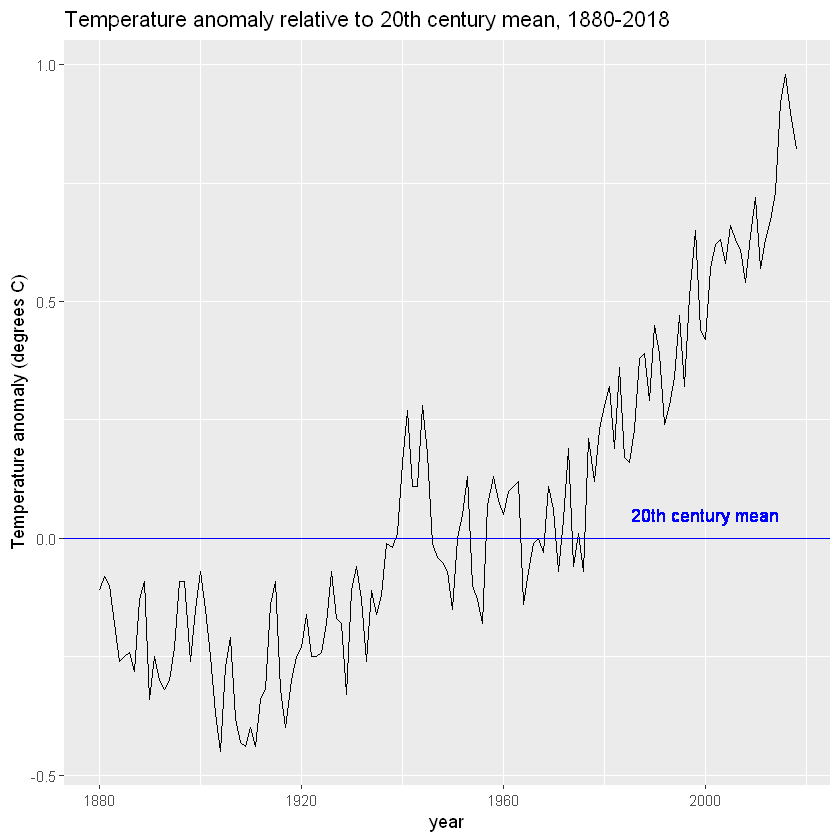

In [45]:
## Agregando información a la gráfica
p + ylab("Temperature anomaly (degrees C)") +
    ggtitle("Temperature anomaly relative to 20th century mean, 1880-2018") +
    geom_text(aes(x = 2000, y = 0.05, label = "20th century mean"), col = "blue")

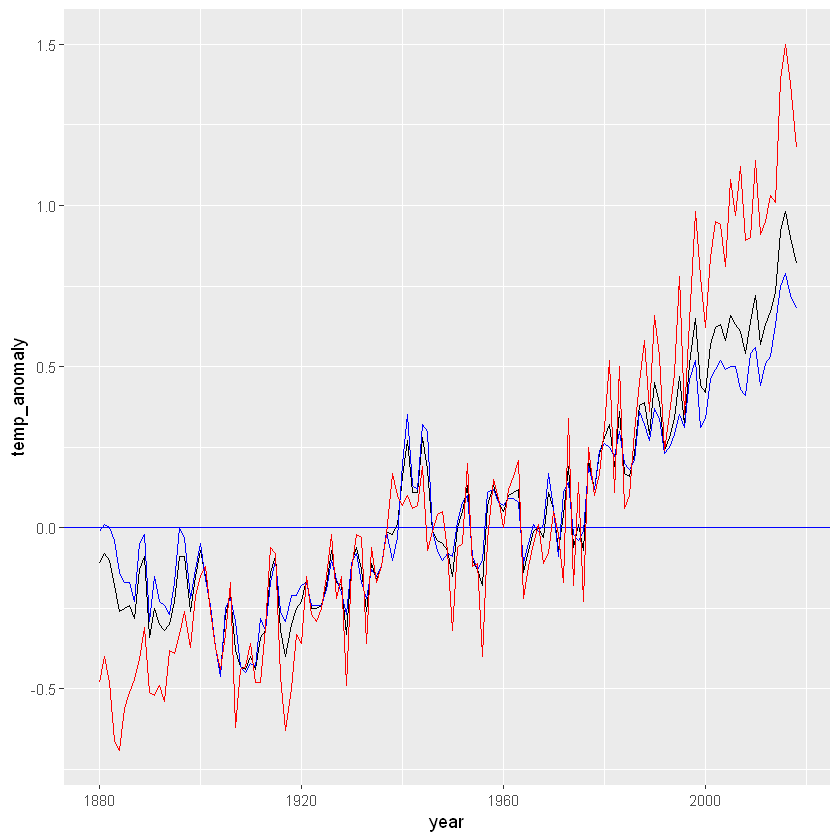

In [47]:
## Agregamos anomalías en el océano y la tierra
p + geom_line(aes(y=ocean_anomaly), color = "blue") +
    geom_line(aes(y=land_anomaly), color = "red")

In [49]:
head(greenhouse_gases)

,year,gas,concentration
,<dbl>,<chr>,<dbl>
1,20,CO2,277.7
2,40,CO2,277.8
3,60,CO2,277.3
4,80,CO2,277.3
5,100,CO2,277.5
6,120,CO2,277.6


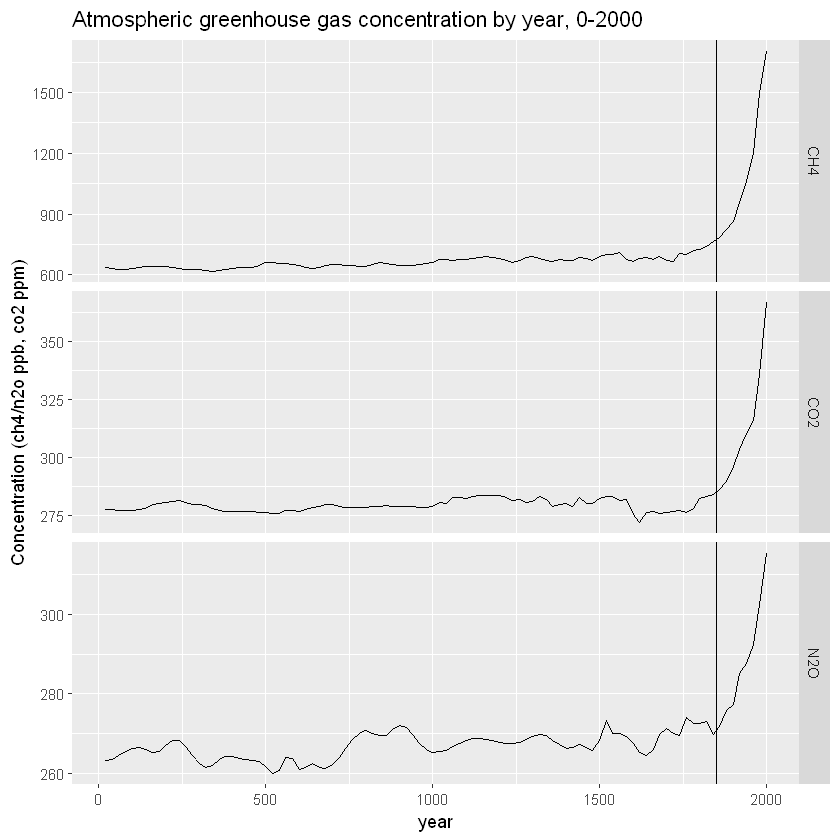

In [52]:
greenhouse_gases %>%
    ggplot(aes(year, concentration, gas)) +
    geom_line() +
    facet_grid(gas ~ ., scales = "free") +
    geom_vline(xintercept = 1850) +
    ylab("Concentration (ch4/n2o ppb, co2 ppm)") +
    ggtitle("Atmospheric greenhouse gas concentration by year, 0-2000")

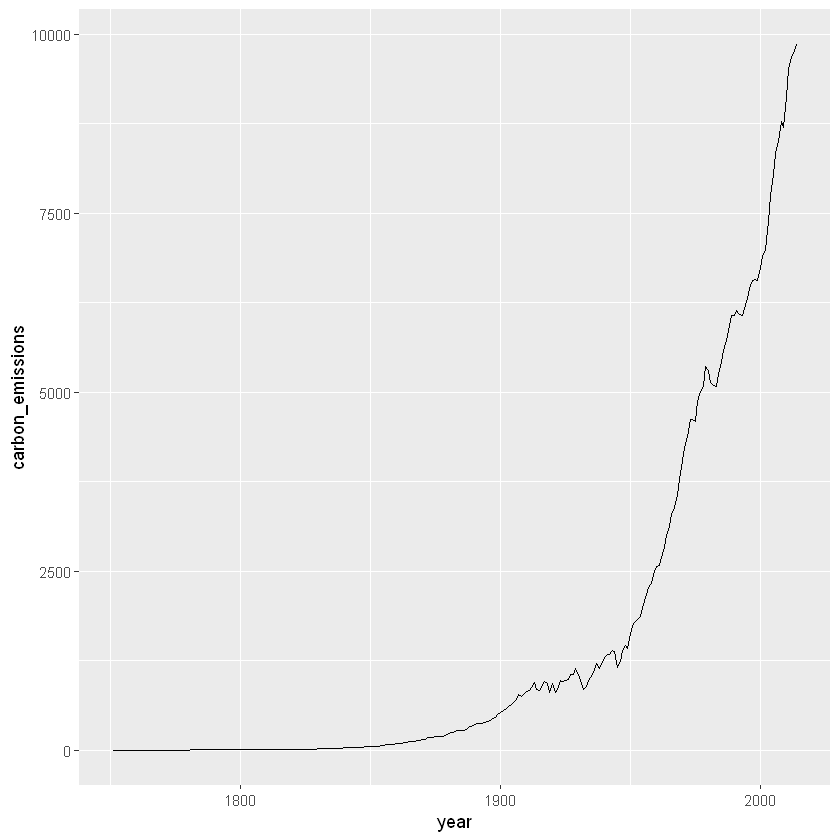

In [54]:
temp_carbon |>
    filter(!is.na(carbon_emissions)) |>
    ggplot(aes(year, carbon_emissions)) +
    geom_line()

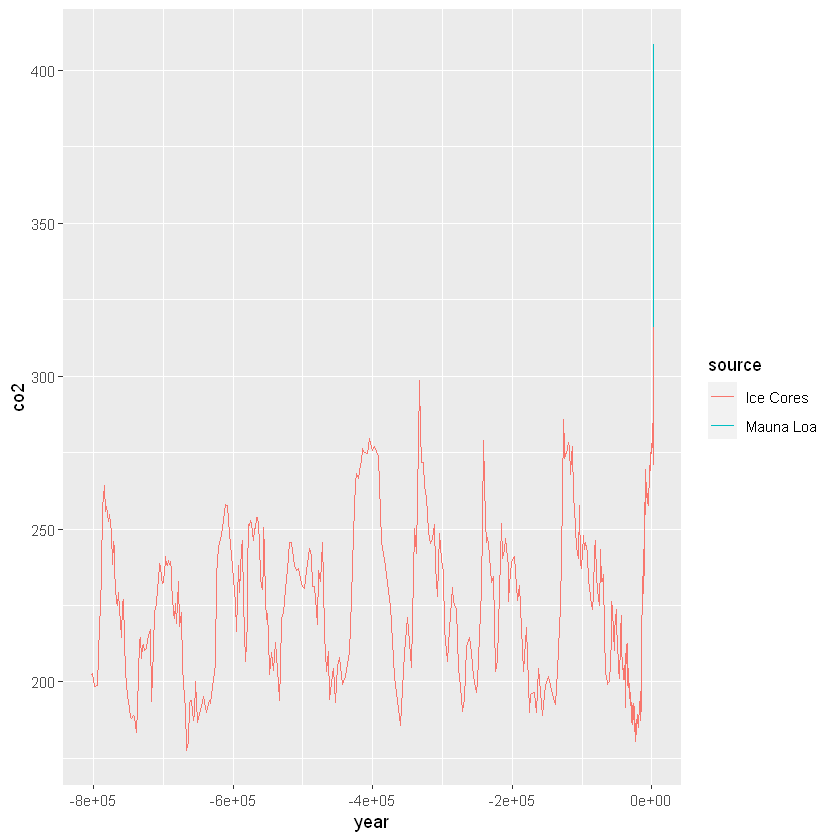

In [56]:
co2_time <- historic_co2 |>
    ggplot(aes(year, co2, color = source)) +
    geom_line()
co2_time

Warning message:
"Removed 683 rows containing missing values (`geom_line()`)."


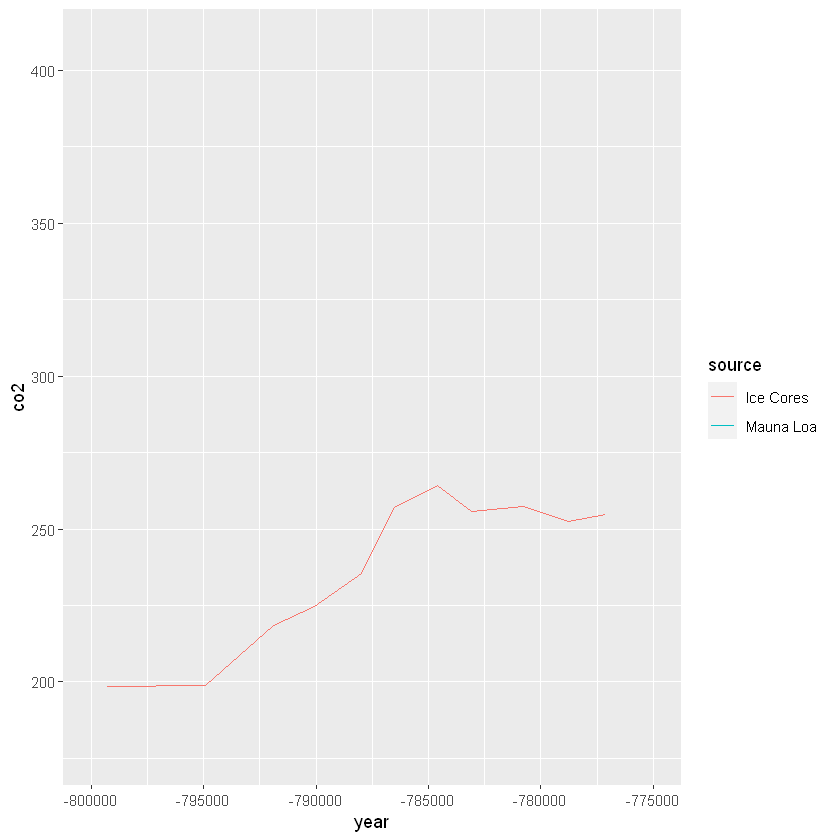

In [62]:
co2_time + xlim(-800000, -775000)

Warning message:
"Removed 683 rows containing missing values (`geom_line()`)."


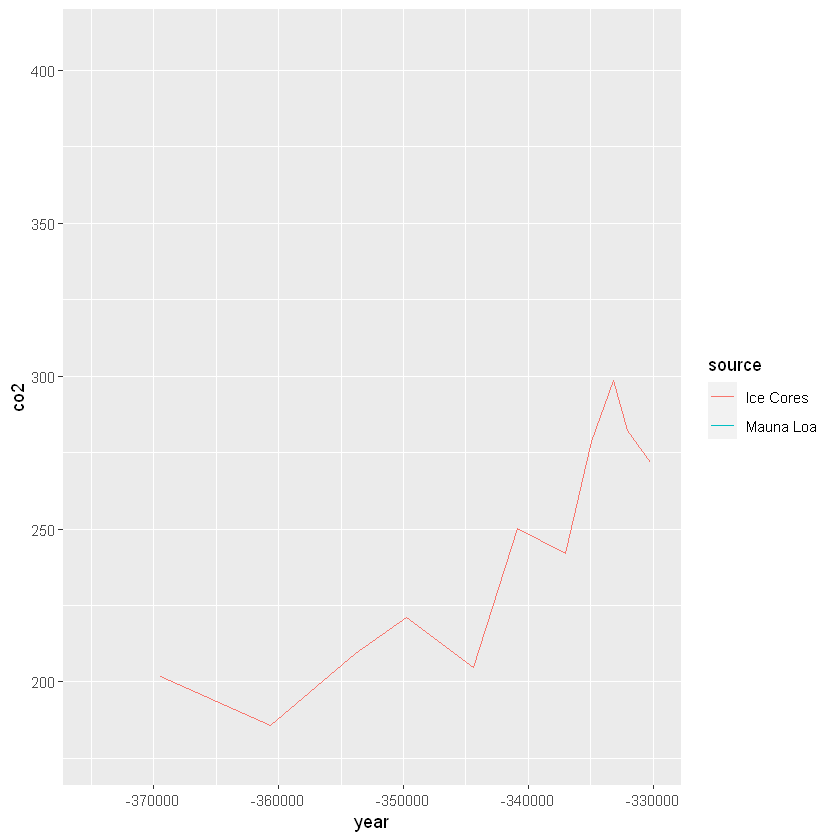

In [58]:
co2_time + xlim(-375000, -330000)

Warning message:
"Removed 683 rows containing missing values (`geom_line()`)."


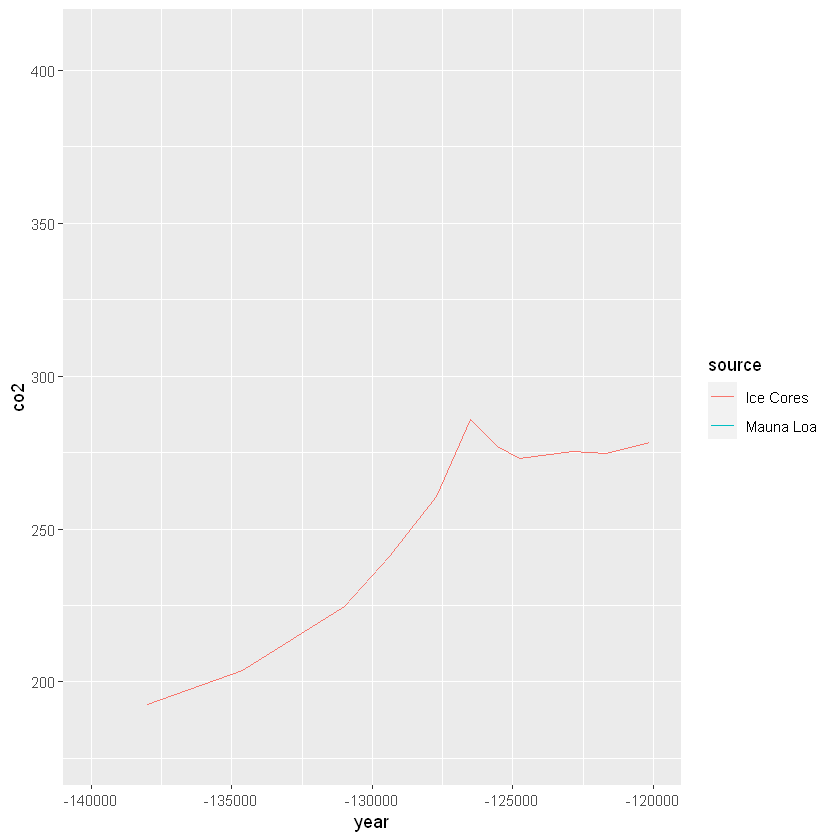

In [59]:
co2_time + xlim(-140000, -120000)

Warning message:
"Removed 539 rows containing missing values (`geom_line()`)."


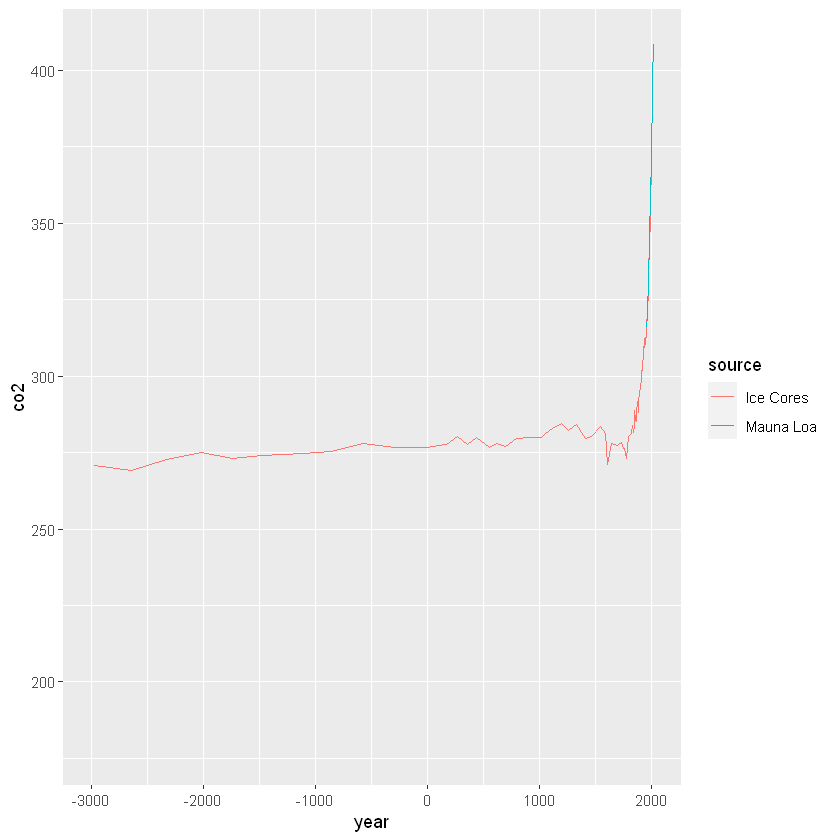

In [61]:
co2_time + xlim(-3000, 2018)